In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb

In [4]:
countries = ['CHN', 'KOR', 'JPN']
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',
    'NE.CON.PRVT.CD': 'Household_Consumption',
    'NE.GDI.TOTL.CD': 'Gross_Investment',
    'NE.CON.GOVT.CD': 'Government_Spending',
    'NE.EXP.GNFS.CD': 'Exports',
    'NE.IMP.GNFS.CD': 'Imports'
}

all_data = {}
for indicator_code, indicator_name in indicators.items():
    data = wb.data.DataFrame(indicator_code, countries, time=range(1970, 2023))
    all_data[indicator_name] = data
    
combined_data = pd.concat(all_data, axis=1)

In [5]:
print("Data Information:")
print(combined_data.info())

print("\nData Sample:")
print(combined_data.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, CHN to KOR
Columns: 318 entries, ('GDP', 'YR1970') to ('Imports', 'YR2022')
dtypes: float64(318)
memory usage: 7.5+ KB
None

Data Sample:
                  GDP                                                          \
               YR1970        YR1971        YR1972        YR1973        YR1974   
economy                                                                         
CHN      9.260263e+10  9.980059e+10  1.136893e+11  1.385432e+11  1.441890e+11   
JPN      2.172237e+11  2.453641e+11  3.249338e+11  4.414606e+11  4.900358e+11   
KOR      9.005145e+09  9.903571e+09  1.086221e+10  1.387647e+10  1.954397e+10   

                                                                               \
               YR1975        YR1976        YR1977        YR1978        YR1979   
economy                                                                         
CHN      1.634295e+11  1.539393e+11  1.749359e+11  1.49540

In [6]:
print("Data Type:")
print(combined_data.dtypes)

print("\nData Summary:")
print(combined_data.describe())

Data Type:
GDP      YR1970    float64
         YR1971    float64
         YR1972    float64
         YR1973    float64
         YR1974    float64
                    ...   
Imports  YR2018    float64
         YR2019    float64
         YR2020    float64
         YR2021    float64
         YR2022    float64
Length: 318, dtype: object

Data Summary:
                GDP                                                          \
             YR1970        YR1971        YR1972        YR1973        YR1974   
count  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   1.062771e+11  1.183561e+11  1.498285e+11  1.979601e+11  2.179229e+11   
std    1.047806e+11  1.188219e+11  1.601243e+11  2.198973e+11  2.437584e+11   
min    9.005145e+09  9.903571e+09  1.086221e+10  1.387647e+10  1.954397e+10   
25%    5.080389e+10  5.485208e+10  6.227576e+10  7.620982e+10  8.186647e+10   
50%    9.260263e+10  9.980059e+10  1.136893e+11  1.385432e+11  1.441890e+11   
75%    1.549131e+1

In [7]:
# Rename columns
combined_df = combined_data.stack().reset_index()
combined_df.columns = ['Country', 'Year', 'GDP', 'Household_Consumption', 
                   'Gross_Investment', 'Government_Spending', 'Exports', 'Imports']

# Convert 'Year' to numeric format
combined_df['Year'] = combined_df['Year'].str.replace('YR', '').astype(int)

print(combined_df.head())

  Country  Year           GDP  Household_Consumption  Gross_Investment  \
0     CHN  1970  9.260263e+10           4.902086e+10      3.043800e+10   
1     CHN  1971  9.980059e+10           5.126312e+10      3.357075e+10   
2     CHN  1972  1.136893e+11           5.942810e+10      3.552599e+10   
3     CHN  1973  1.385432e+11           7.200606e+10      4.565832e+10   
4     CHN  1974  1.441890e+11           7.480469e+10      4.787967e+10   

   Government_Spending       Exports       Imports  
0         1.015090e+10  2.274220e+09  2.201560e+09  
1         1.182068e+10  2.710416e+09  2.233127e+09  
2         1.365393e+10  3.537210e+09  2.916450e+09  
3         1.590370e+10  5.959279e+09  5.257791e+09  
4         1.737323e+10  7.213067e+09  7.716198e+09  


C:\Users\kang3\AppData\Local\Temp\ipykernel_32524\1796775145.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  combined_df = combined_data.stack().reset_index()


In [8]:
# Data Cleaning
# Check missing values

combined_df.isnull().sum()

Country                  0
Year                     0
GDP                      0
Household_Consumption    0
Gross_Investment         0
Government_Spending      0
Exports                  0
Imports                  0
dtype: int64

In [9]:
# Check duplicated data

combined_df.duplicated().sum()

np.int64(0)

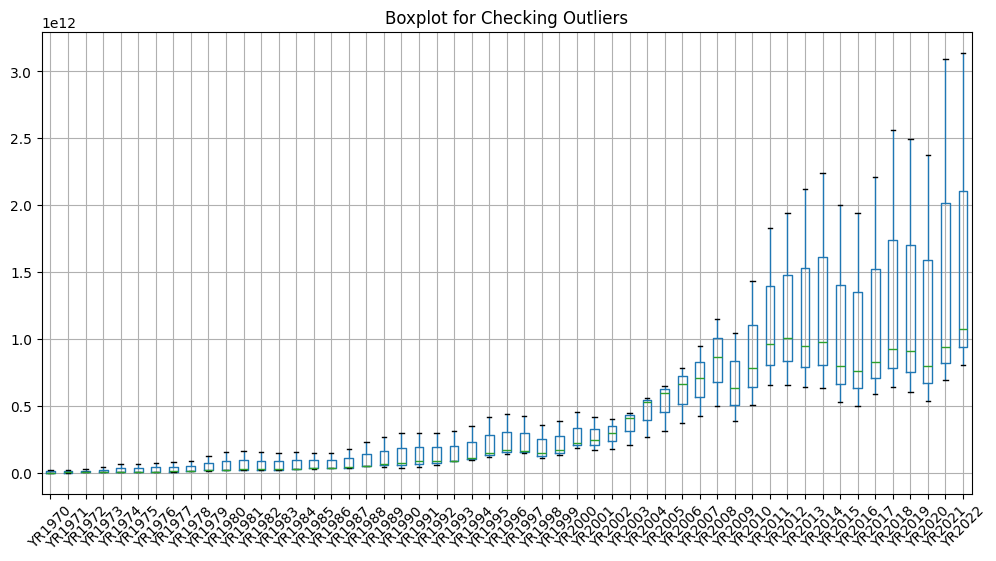


Number of Outliers:
YR1970    0
YR1971    0
YR1972    0
YR1973    0
YR1974    0
YR1975    0
YR1976    0
YR1977    0
YR1978    0
YR1979    0
YR1980    0
YR1981    0
YR1982    0
YR1983    0
YR1984    0
YR1985    0
YR1986    0
YR1987    0
YR1988    0
YR1989    0
YR1990    0
YR1991    0
YR1992    0
YR1993    0
YR1994    0
YR1995    0
YR1996    0
YR1997    0
YR1998    0
YR1999    0
YR2000    0
YR2001    0
YR2002    0
YR2003    0
YR2004    0
YR2005    0
YR2006    0
YR2007    0
YR2008    0
YR2009    0
YR2010    0
YR2011    0
YR2012    0
YR2013    0
YR2014    0
YR2015    0
YR2016    0
YR2017    0
YR2018    0
YR2019    0
YR2020    0
YR2021    0
YR2022    0
dtype: int64


In [10]:
# Check outliers

# Boxplot
plt.figure(figsize=(12, 6))
data.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title("Boxplot for Checking Outliers")
plt.xticks(rotation=45)
plt.show()

# IQR Method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

print("\nNumber of Outliers:")
print(outliers.sum())

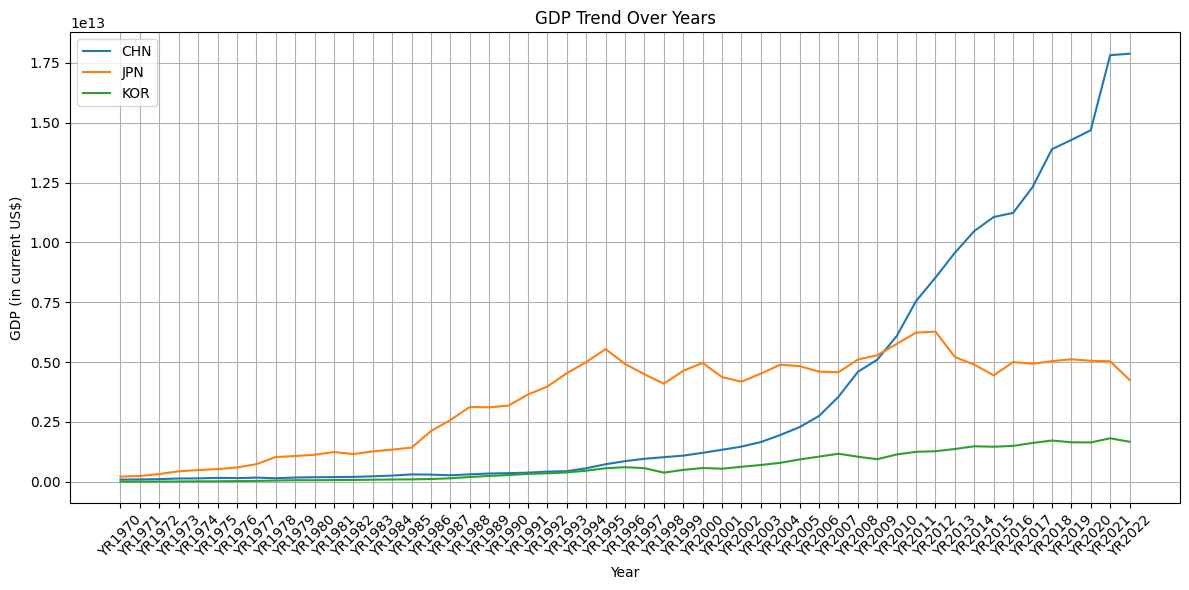

In [11]:
# GDP trend over years

plt.figure(figsize=(12, 6))
for country in ['CHN', 'JPN', 'KOR']:
    plt.plot(combined_data.loc[country, 'GDP'], label=country)

plt.xticks(rotation=45, fontsize=10)

plt.title("GDP Trend Over Years")
plt.xlabel("Year")
plt.ylabel("GDP (in current US$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


▲

**China**

China's GDP shows a sharp increase, especially after the early 2000s. This reflects China’s economic reforms, globalization, and its shift toward manufacturing and export-driven growth.

**Japan**

Japan's GDP grows steadily but at a much slower rate compared to China, with noticeable slowdowns during the 1990s, likely due to the economic stagnation Japan experienced during the "Lost Decade."

**South Korea**

South Korea's GDP shows a slight increase, with a noticeable rise in the late 2000s, reflecting the country’s industrialization and integration into the global economy.

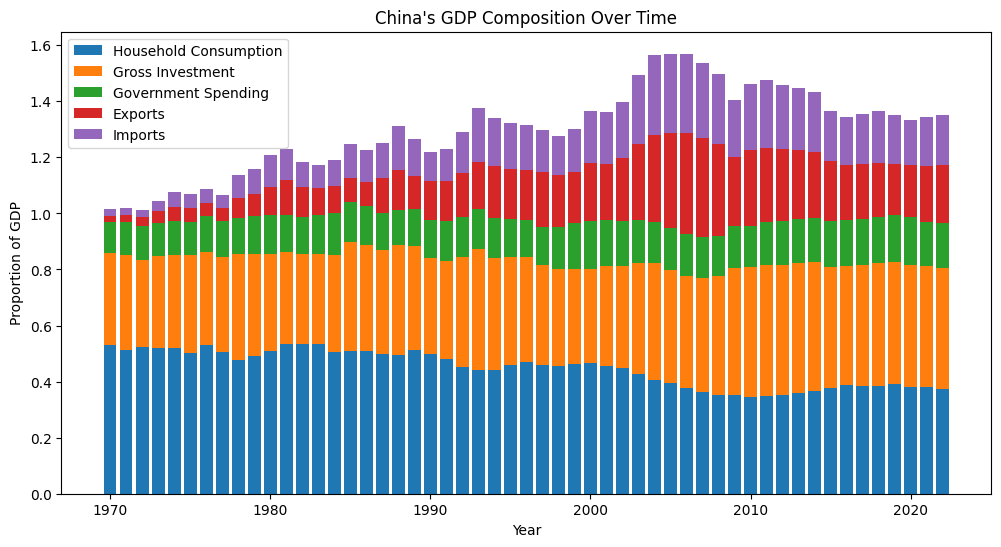

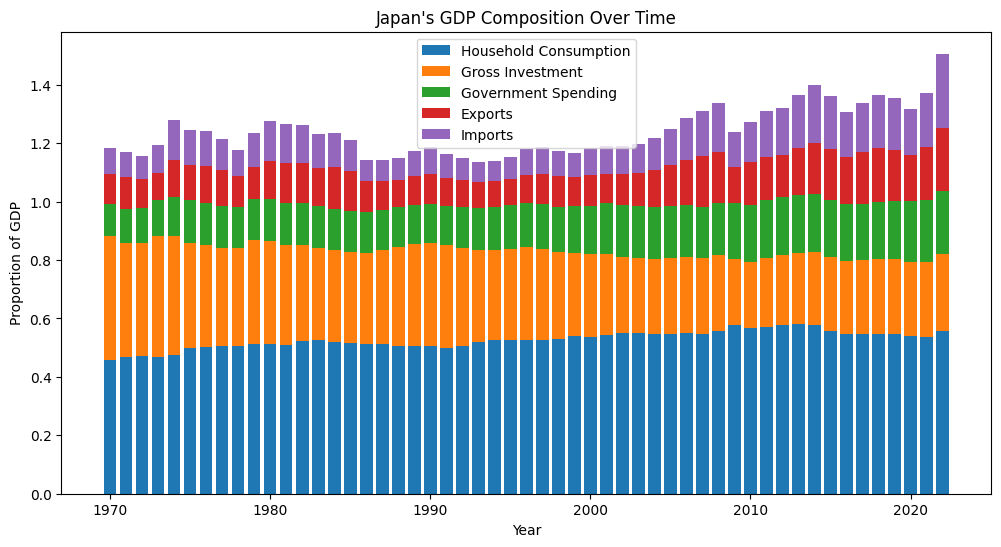

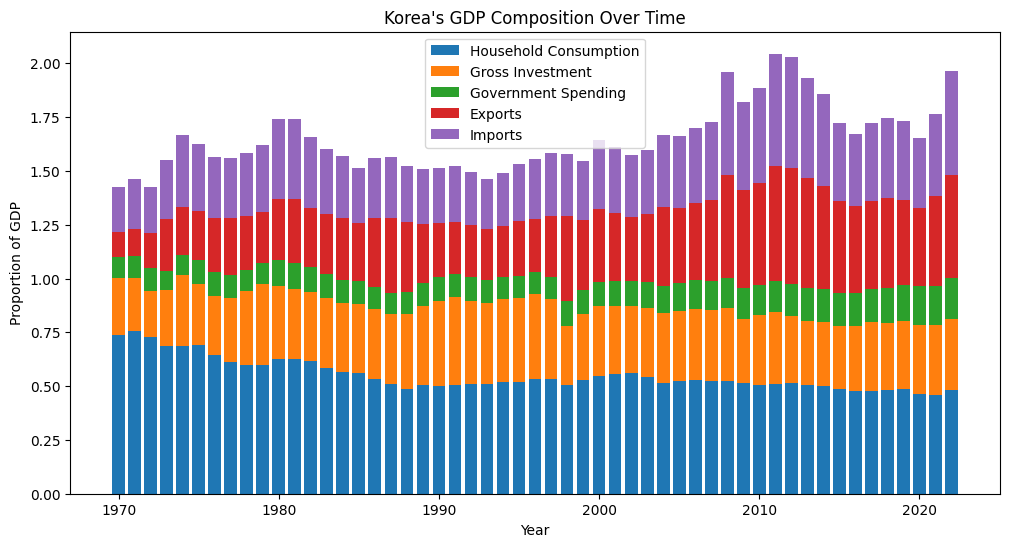

In [12]:
# Calculate and visualize the proportion of each variable to GDP
# Helps understand how each country's economy is structured over time

# Filter data for each country
df_china = combined_df[combined_df['Country'] == 'CHN'].copy()
df_japan = combined_df[combined_df['Country'] == 'JPN'].copy()
df_korea = combined_df[combined_df['Country'] == 'KOR'].copy()

for df in [df_china, df_japan, df_korea]:
    df['Household_Consumption_pct'] = df['Household_Consumption'] / df['GDP']
    df['Gross_Investment_pct'] = df['Gross_Investment'] / df['GDP']
    df['Government_Spending_pct'] = df['Government_Spending'] / df['GDP']
    df['Exports_pct'] = df['Exports'] / df['GDP']
    df['Imports_pct'] = df['Imports'] / df['GDP']

# Define a function to visualize GDP composition over time
def plot_gdp_composition(df, country_name):
    plt.figure(figsize=(12,6))
    plt.bar(df['Year'], df['Household_Consumption_pct'], label='Household Consumption')
    plt.bar(df['Year'], df['Gross_Investment_pct'], bottom=df['Household_Consumption_pct'], label='Gross Investment')
    plt.bar(df['Year'], df['Government_Spending_pct'], 
            bottom=df['Household_Consumption_pct'] + df['Gross_Investment_pct'], label='Government Spending')
    plt.bar(df['Year'], df['Exports_pct'], 
            bottom=df['Household_Consumption_pct'] + df['Gross_Investment_pct'] + df['Government_Spending_pct'], label='Exports')
    plt.bar(df['Year'], df['Imports_pct'], 
            bottom=df['Household_Consumption_pct'] + df['Gross_Investment_pct'] + df['Government_Spending_pct'] + df['Exports_pct'], 
            label='Imports')

    plt.xlabel('Year')
    plt.ylabel('Proportion of GDP')
    plt.title(f"{country_name}'s GDP Composition Over Time")
    plt.legend()
    plt.show()

plot_gdp_composition(df_china, "China")
plot_gdp_composition(df_japan, "Japan")
plot_gdp_composition(df_korea, "Korea")


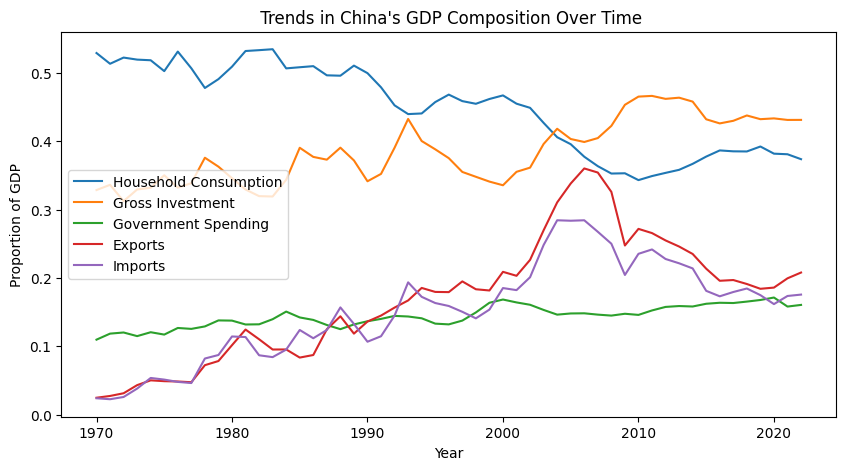

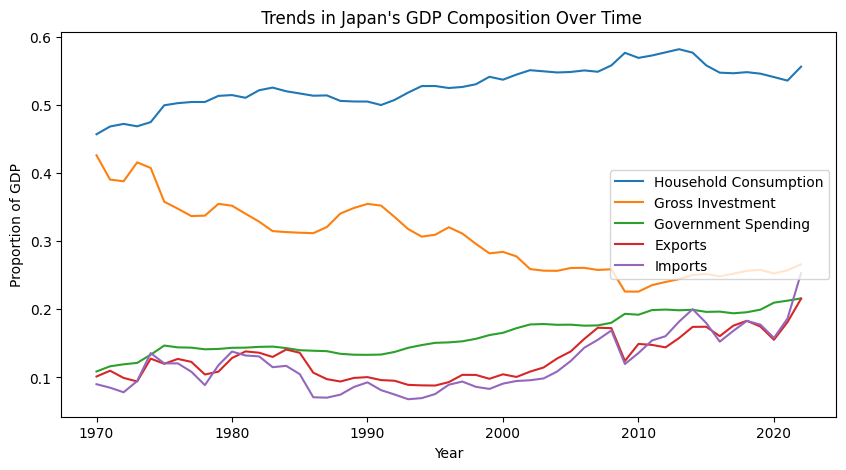

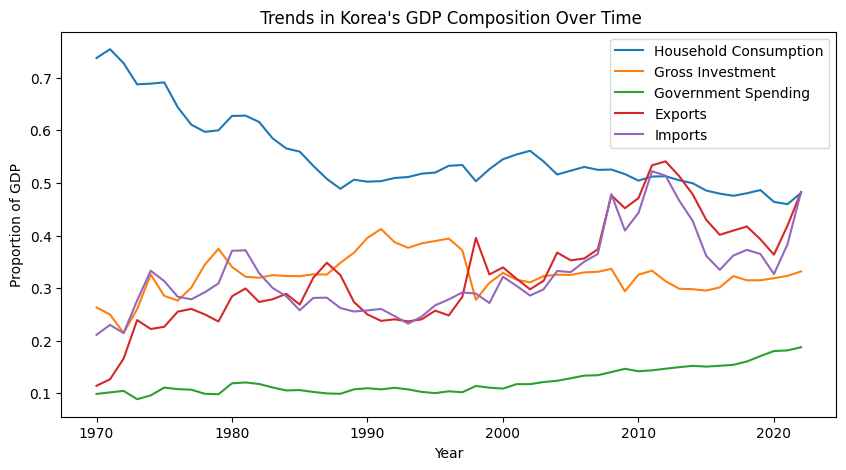

In [13]:
# Define a function to generate trend graphs for each country
# Helps analyze long-term economic shifts in each country

def plot_gdp_trend(df, country_name):
    plt.figure(figsize=(10,5))
    plt.plot(df['Year'], df['Household_Consumption_pct'], label='Household Consumption')
    plt.plot(df['Year'], df['Gross_Investment_pct'], label='Gross Investment')
    plt.plot(df['Year'], df['Government_Spending_pct'], label='Government Spending')
    plt.plot(df['Year'], df['Exports_pct'], label='Exports')
    plt.plot(df['Year'], df['Imports_pct'], label='Imports')

    plt.xlabel('Year')
    plt.ylabel('Proportion of GDP')
    plt.title(f" Trends in {country_name}'s GDP Composition Over Time")
    plt.legend()
    plt.show()

plot_gdp_trend(df_china, "China")
plot_gdp_trend(df_japan, "Japan")
plot_gdp_trend(df_korea, "Korea")


▲

**China**

Starting in the late 1990s, investment saw a significant rise and became the major contributors to GDP. While household consumption gradually decreased, exports and imports sharply rose in the late 2000s.

**Japan**

Household consumption has steadily increased, maintaining its position as the largest component of GDP. However, investment experienced significant fluctuations, particularly during the 1990s. Exports and imports continued to grow, though their rate of increase slowed in the late 2000s.

**South Korea**
Household consumption gradually decreases, but still contributes significantly to GDP growth. Exports and imports have consistently risen, becoming a major driver of economic growth.

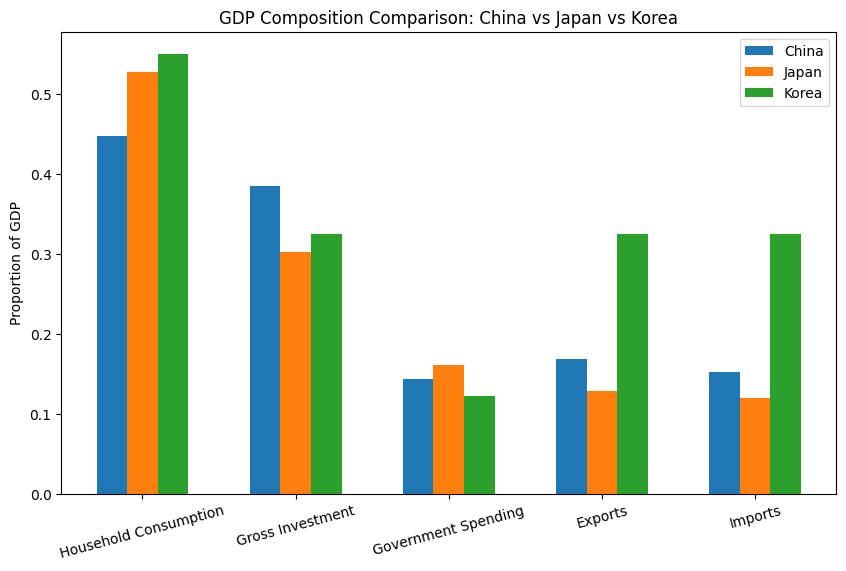

In [14]:
# Calculate the average proportion of GDP components for each country
# Helps compare economic structures by analyzing the relative importance of each component

avg_china = df_china[['Household_Consumption_pct', 'Gross_Investment_pct', 'Government_Spending_pct', 'Exports_pct', 'Imports_pct']].mean()
avg_japan = df_japan[['Household_Consumption_pct', 'Gross_Investment_pct', 'Government_Spending_pct', 'Exports_pct', 'Imports_pct']].mean()
avg_korea = df_korea[['Household_Consumption_pct', 'Gross_Investment_pct', 'Government_Spending_pct', 'Exports_pct', 'Imports_pct']].mean()

labels = ['Household Consumption', 'Gross Investment', 'Government Spending', 'Exports', 'Imports']
china_values = avg_china.values
japan_values = avg_japan.values
korea_values = avg_korea.values

x = np.arange(len(labels))

plt.figure(figsize=(10,6))
plt.bar(x - 0.2, china_values, width=0.2, label="China")
plt.bar(x, japan_values, width=0.2, label="Japan")
plt.bar(x + 0.2, korea_values, width=0.2, label="Korea")

plt.xticks(x, labels, rotation=15)
plt.ylabel('Proportion of GDP')
plt.title('GDP Composition Comparison: China vs Japan vs Korea')
plt.legend()
plt.show()

▲

**China**

Household Consumption and Gross Investment make up a large proportion of China’s GDP. Exports and Imports are relatively low.

**Japan**

Household Consumption accounts for the largest portion of Japan’s GDP. Gross Investment, Exports, and Imports are lower compared to China and South Korea, while Government Spending is higher.

**South Korea**

South Korea is trade-driven, meaning that its exports and imports play a major role in the country's economic structure compared to China and Japan. Gross Investment and Household Consumption are also relatively high, while Government Spending is lower than the other two countries.

## ARIMA MODEL

### This section prepares South Korea's GDP data for ARIMA modeling by ensuring stationarity and interpretability.

### Log Transformation: Converts exponential GDP growth into a linear trend, stabilizing variance and making long-term analysis easier.

### Handling Missing Data: Replaces gaps to maintain continuity, ensuring an undistorted economic trend.

### Stationarity Check (ADF Test): The p-value (0.002) confirms stationarity, meaning GDP fluctuations are stable over time.

### Economic Interpretation: The log-transformed GDP shows steady growth, with downturns during the 1997 Asian Crisis and 2008 Financial Crisis, reflecting economic shocks.

### This step ensures data validity, making it suitable for ARIMA forecasting.

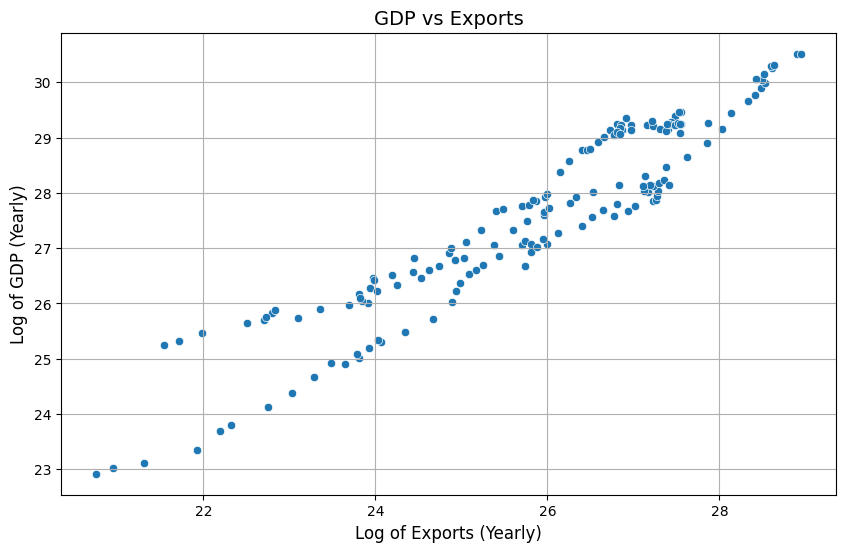

In [15]:
combined_data.columns = ['_'.join(map(str, col)) if isinstance(col, tuple) else col for col in combined_data.columns]

gdp_data = combined_data.filter(like='GDP_')
exports_data = combined_data.filter(like='Exports_')

gdp_data.columns = [col.split('_')[1] for col in gdp_data.columns]
exports_data.columns = [col.split('_')[1] for col in exports_data.columns]

gdp_data = gdp_data.T.reset_index()
gdp_data.columns = ['Year'] + [f'Country_{i}' for i in range(1, gdp_data.shape[1])]

exports_data = exports_data.T.reset_index()
exports_data.columns = ['Year'] + [f'Country_{i}' for i in range(1, exports_data.shape[1])]

gdp_data = gdp_data[~gdp_data['Year'].str.contains('Avg|Total')]
exports_data = exports_data[~exports_data['Year'].str.contains('Avg|Total')]

gdp_data_long = gdp_data.melt(id_vars='Year', var_name='Country', value_name='GDP')
exports_data_long = exports_data.melt(id_vars='Year', var_name='Country', value_name='Exports')

yearly_data = pd.merge(gdp_data_long, exports_data_long, on=['Year', 'Country'])

yearly_data['GDP_Log'] = np.log1p(yearly_data['GDP'])
yearly_data['Exports_Log'] = np.log1p(yearly_data['Exports'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exports_Log', y='GDP_Log', data=yearly_data)
plt.title("GDP vs Exports", fontsize=14)
plt.xlabel("Log of Exports (Yearly)", fontsize=12)
plt.ylabel("Log of GDP (Yearly)", fontsize=12)
plt.grid(True)
plt.show()

## ARIMA MODEL

### This section prepares South Korea's GDP data for ARIMA modeling by ensuring stationarity and interpretability.

### Log Transformation: Converts exponential GDP growth into a linear trend, stabilizing variance and making long-term analysis easier.

### Handling Missing Data: Replaces gaps to maintain continuity, ensuring an undistorted economic trend.

### Stationarity Check (ADF Test): The p-value (0.002) confirms stationarity, meaning GDP fluctuations are stable over time.

### Economic Interpretation: The log-transformed GDP shows steady growth, with downturns during the 1997 Asian Crisis and 2008 Financial Crisis, reflecting economic shocks.

### This step ensures data validity, making it suitable for ARIMA forecasting.

Number of missing values: 0
1970-01-01    9.005145e+09
1971-01-01    9.903571e+09
1972-01-01    1.086221e+10
1973-01-01    1.387647e+10
1974-01-01    1.954397e+10
Name: KOR, dtype: float64
Original Log GDP ADF Statistic: -3.8680779699574 p-value: 0.002282748435262257


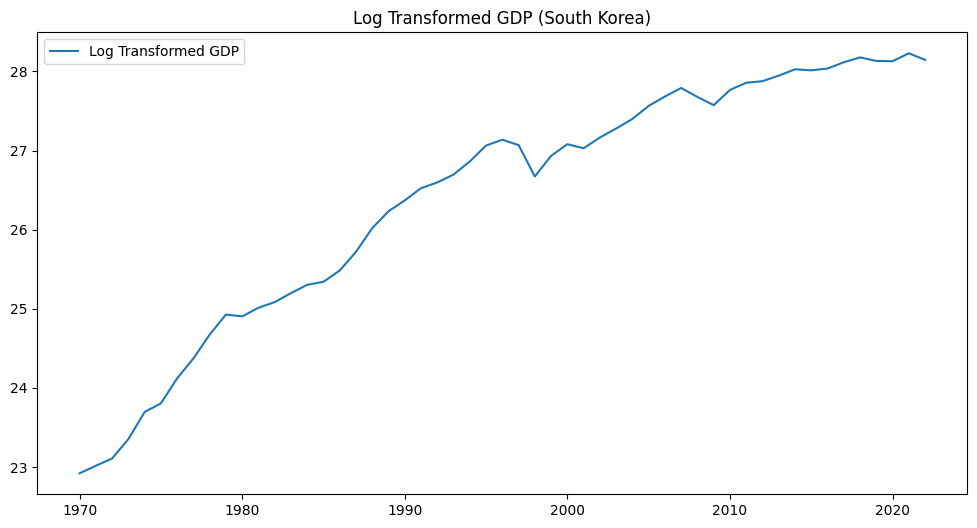

In [16]:
import arima_model 

KOR_GDP_log = arima_model.process_gdp_data(combined_data)  
arima_model.adf_test(KOR_GDP_log) 

### This section identifies ARIMA model parameters by analyzing GDP residual correlations.

### ACF (Autocorrelation Function):

### Exhibits a gradual decay, indicating a moving average (MA) component.
### Suggests GDP growth is influenced by past shocks over time.
### PACF (Partial Autocorrelation Function):

### Shows a sharp cutoff after lag 1, suggesting an autoregressive (AR) component.
### Implies GDP is primarily influenced by its immediate past value.
### Economic Interpretation:

### Captures persistence in economic growth—past GDP influences future trends.
### Helps determine optimal ARIMA order, ensuring accurate forecasting.

<Figure size 1200x600 with 0 Axes>

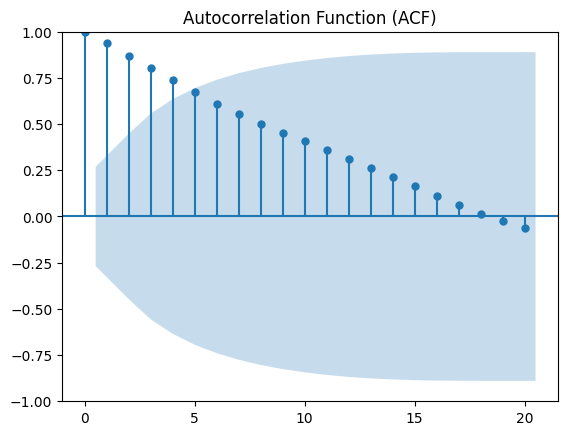

<Figure size 1200x600 with 0 Axes>

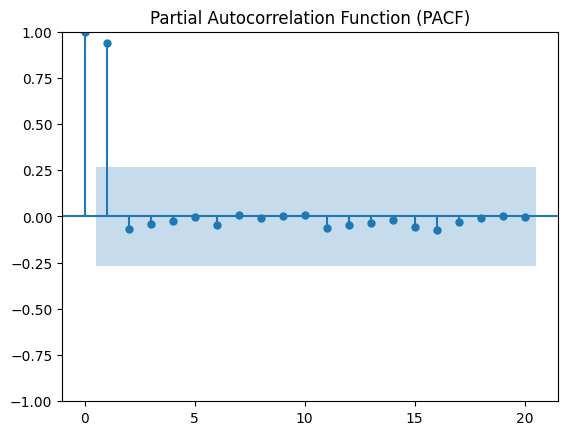

In [17]:
import acf_pacf_plot

stationary_series = KOR_GDP_log
acf_pacf_plot.plot_acf_pacf(stationary_series)

### This ARIMA(2,0,0) model shows GDP strongly depends on its past two values (AR1 = 1.56, AR2 = -0.56). Both lags are statistically significant (p < 0.01), indicating persistent growth patterns and potential cyclical effects. The Ljung-Box test (p = 0.09) confirms no strong autocorrelation in residuals, while the Jarque-Bera test (p = 0.00) suggests non-normality, requiring further checks. The model provides a solid basis for forecasting GDP trends.

In [18]:
from statsmodels.tsa.arima.model import ARIMA
KOR_GDP_log = KOR_GDP_log.asfreq('YS')


arima_model = ARIMA(KOR_GDP_log, order=(2, 0, 0))
arima_result = arima_model.fit()

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                    KOR   No. Observations:                   53
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  28.346
Date:                Thu, 06 Feb 2025   AIC                            -48.692
Time:                        17:25:10   BIC                            -40.811
Sample:                    01-01-1970   HQIC                           -45.661
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5944      2.076     12.330      0.000      21.526      29.663
ar.L1          1.5601      0.128     12.233      0.000       1.310       1.810
ar.L2         -0.5637      0.120     -4.689      0.0

### The Ljung-Box test (p = 0.999) confirms no autocorrelation in residuals, indicating the model captures GDP dynamics well. The QQ plot shows residuals closely follow a normal distribution, except for slight deviations at the tails. This suggests the model's assumptions hold, making it reliable for forecasting.

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  1.448939   0.999086


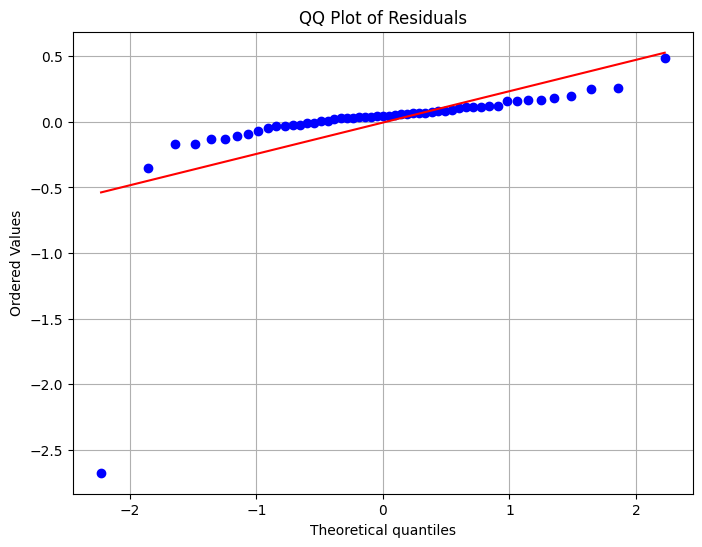

In [19]:
import residual_analysis

residual_analysis.analyze_residuals(arima_result)

### The ARIMA forecast predicts future GDP trends based on past data. The green line represents the expected log-transformed GDP, while the gray confidence interval reflects uncertainty. The slight decline suggests potential economic stagnation or slower growth, emphasizing the need for careful economic policy planning.

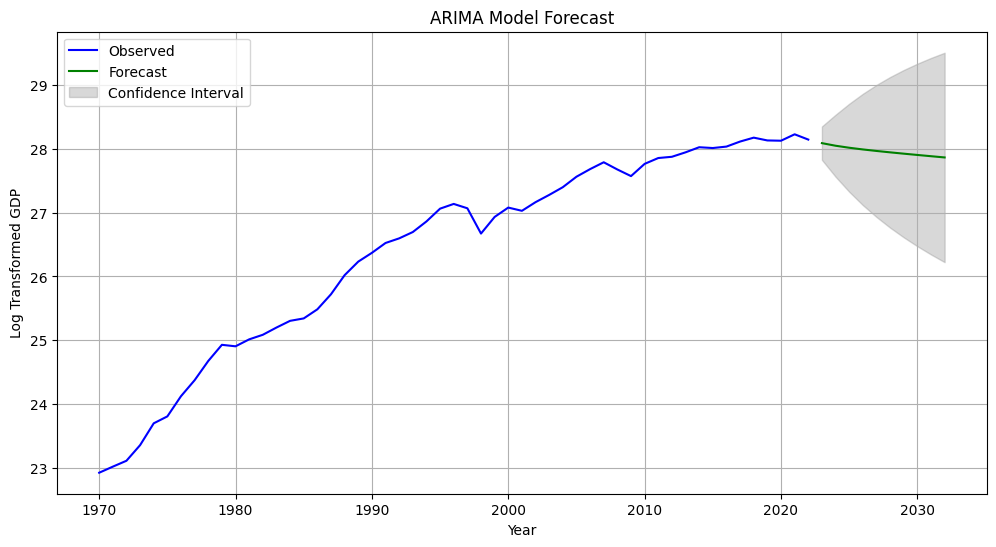

In [20]:
import forecast_plot

forecast_plot.plot_forecast(arima_result, stationary_series, forecast_steps=10)